# **Linear Regression**
---

## **What is Regression?**

Regression, in statistical terms, refers to a method used to understand and quantify the relationship between a dependent variable and one or more independent variables. It's commonly used for predictive modeling and understanding how changes in the independent variables are associated with changes in the dependent variable.

## **Types of Regression**

1. **Linear Regression**:
   - *Simple Linear Regression*: A basic model with one predictor variable.
   - *Multiple Linear Regression*: Includes multiple predictors for one outcome variable.

2. **Logistic Regression**:
   - Used for binary classification tasks.

3. **Polynomial Regression**:
   - Models curved relationships with polynomial terms.

4. **Ridge Regression** and **Lasso Regression**:
   - Regularization techniques to prevent overfitting.

5. **ElasticNet Regression**:
   - Combines ridge and lasso penalties.

6. **Stepwise Regression**:
   - Automatically selects significant variables.

7. **Ordinal Regression**:
   - Handles ordinal outcome variables.

8. **Poisson Regression**:
   - Used for count data following a Poisson distribution.

9. **Time Series Regression**:
   - Models time-dependent data.

10. **Generalized Additive Models (GAMs)**:
    - Captures non-linear relationships with spline functions.

11. **Bayesian Regression**:
    - Uses Bayesian inference for parameter estimation.

12. **Hierarchical Regression**:
    - Incorporates nested data structures.

13. **Robust Regression**:
    - Less sensitive to outliers.

14. **Quantile Regression**:
    - Estimates different quantiles of the dependent variable.

## **Correlation and Causation**

### **`Correlation`**

**Definition**: `Correlation` refers to a statistical measure that describes the extent to which two variables are related or move together in a predictable manner. It quantifies the strength and direction of a linear relationship between two variables.

- **Strength of Relationship**: Correlation coefficients range from -1 to +1. A value close to +1 indicates a strong positive correlation (both variables increase together), a value close to -1 indicates a strong negative correlation (one variable increases as the other decreases), and a value around 0 indicates little to no linear relationship.
  
- **Direction of Relationship**: Positive correlation means that as one variable increases, the other tends to increase as well. Negative correlation means that as one variable increases, the other tends to decrease.

### **`Causation`**

**Definition**: `Causation` implies that one variable directly influences or causes a change in another variable. Establishing causation requires demonstrating not only a correlation but also a clear mechanism or relationship where changes in one variable lead to changes in another.

- **Temporal Relationship**: The cause must precede the effect in time.
  
- **Coherence**: The relationship should make sense logically and fit with existing knowledge.

- **Control**: Alternative explanations and confounding variables should be adequately controlled to establish a causal relationship.

### Difference between Correlation and Causation

- **Correlation Does Not Imply Causation**: Even if two variables are strongly correlated, it does not necessarily mean that one causes the other. Correlation only shows association or relationship.

- **Causation Requires More Evidence**: Establishing causation requires additional evidence beyond correlation, including experimental studies, randomized controlled trials, or thorough analysis of potential confounders.

## **Observational and Experimental Data**

### **`Observational Data`**

**Definition**: Observational data is collected by observing and recording naturally occurring events or behaviors without intervening or manipulating the study subjects.

- **Nature of Data Collection**: Researchers passively observe subjects in their natural environment or under existing conditions without introducing changes.

- **Example**: A study observing the relationship between exercise habits and cardiovascular health by recording individuals' exercise routines and monitoring their heart health over time.

### **`Experimental Data`**

**Definition**: Experimental data is collected through controlled experiments where researchers intentionally manipulate one or more variables to observe the effect on another variable.

- **Nature of Data Collection**: Researchers actively intervene by applying specific treatments or conditions to study subjects under controlled settings.

- **Example**: A clinical trial testing the effectiveness of a new drug by randomly assigning participants into treatment and control groups, then measuring health outcomes.

### Key Differences

- **Control over Variables**: Experimental data allows researchers to control and manipulate variables to establish cause-and-effect relationships, whereas observational data relies on natural observations without intervention.

- **Causality**: Experimental data can provide stronger evidence of causality compared to observational data, which is more susceptible to confounding factors and biases.

- **Ethical Considerations**: Experimental data collection may involve ethical considerations related to interventions and treatments applied to study subjects, while observational data collection is less intrusive.

Observational and experimental data represent distinct approaches to data collection in research. The choice between these methods depends on the research question, feasibility of manipulation, ethical considerations, and desired level of control over variables. Understanding the differences between observational and experimental data is essential for designing rigorous studies and interpreting research findings accurately.

## **Regression Fornula**
The formula for regression is-

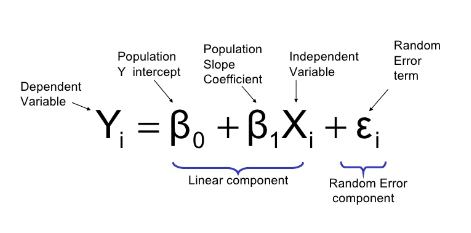

## **Simple Linear Regression Model**

### Pre-Processing Data for Regression

In [41]:
import numpy as np
import pandas as pd
import math

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import os

In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        src = os.path.join(dirname, filename)

In [31]:
df = pd.read_csv(src)
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [32]:
# drop rows with NaN values inplace
df.dropna(inplace=True)

# reset index after dropping NaN rows
df.reset_index(drop=True, inplace=True)

In [33]:
# label encoder
label_encoder = LabelEncoder()
df["Pop"] = label_encoder.fit_transform(df["Pop"])
df["sex"] = label_encoder.fit_transform(df["sex"])

df = df[['case', 'site', 'Pop', 'sex', 'age', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly', 'hdlngth']]

df.head()

,case,site,Pop,sex,age,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,hdlngth
0,1,1,0,1,8.0,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,94.1
1,2,1,0,0,6.0,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,92.5
2,3,1,0,0,6.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,94.0
3,4,1,0,0,6.0,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,93.2
4,5,1,0,0,2.0,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,91.5


In [34]:
# splitting data
X = df.drop("hdlngth", axis = 1)
y = df["hdlngth"]

# standardizing data
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# **Model Creation**

In [36]:
# making a linear regression model class
model = LinearRegression()

# fitting training and testing data into model to train it
model.fit(X_train, y_train)

# making predictions
y_pred = model.predict(X_test)

In [46]:
# checking error and R2 scores
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Square Error: {round(rmse,4)}")
print(f"R2 Score: {round(r2,4)}")

Root Mean Square Error: 1.6527
R2 Score: 0.7663


 - The **`error`** value is very low which means that the predicted values are not too far away from the original values but the **`R2 Score`** is around 76.63% of the data can be explain with this model. Lower the value of error and higher the value of R2 Score - better the model's performance!

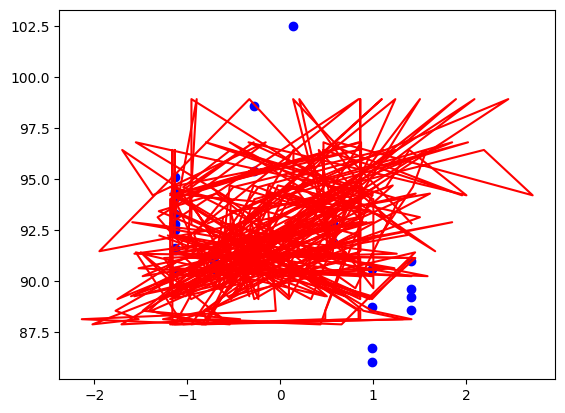

In [54]:
plt.scatter(X_test[:,1], y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
# plt.legend()
plt.show()

In [48]:
import matplotlib.pyplot as plt

In [50]:
X.shape

(101, 13)

In [51]:
y.shape

(101,)

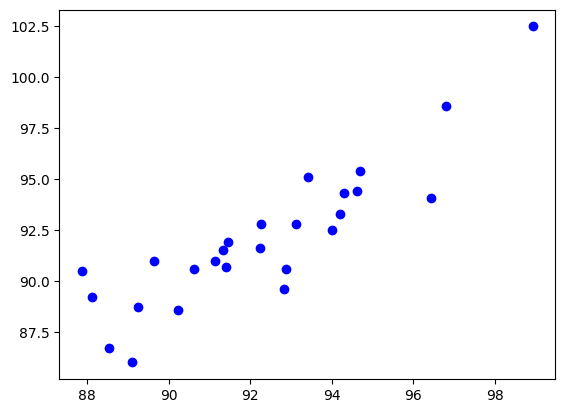

In [55]:
plt.scatter(y_pred, y_test, color='blue', label='Actual')